# Introduction

This notebook shows how to plot and analyze a phase diagram.

In [ ]:
# Uncomment the subsequent lines in this cell to install dependencies for Google Colab.
# !pip install pymatgen==2022.7.19

In [ ]:
from pymatgen.analysis.phase_diagram import PDPlotter, PhaseDiagram
from pymatgen.ext.matproj import MPRester

%matplotlib inline

## Generating the phase diagram

To generate a phase diagram, we obtain entries from the Materials Project and call the PhaseDiagram class in pymatgen.

In [ ]:
# This initializes the REST adaptor. You may need to put your own API key in as an arg.
mpr = MPRester()

# Entries are the basic unit for thermodynamic and other analyses in pymatgen.
# This gets all entries belonging to the Ca-C-O system.
entries = mpr.get_entries_in_chemsys(["Ca", "C", "O"])

# With entries, you can do many sophisticated analyses, like creating phase diagrams.
pd = PhaseDiagram(entries)

## Plotting the phase diagram

To plot a phase diagram, we send our phase diagram object into the PDPlotter class.

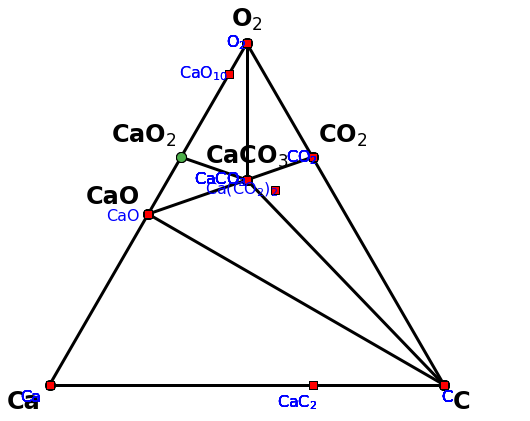

In [ ]:
# Let's show all phases, including unstable ones
plotter = PDPlotter(pd, show_unstable=0.2, backend="matplotlib")
plotter.show()

## Calculating energy above hull and other phase equilibria properties

In [ ]:
import collections

data = collections.defaultdict(list)
for e in entries:
    decomp, ehull = pd.get_decomp_and_e_above_hull(e)
    data["Materials ID"].append(e.entry_id)
    data["Composition"].append(e.composition.reduced_formula)
    data["Ehull"].append(ehull)
    data["Decomposition"].append(
        " + ".join([f"{v:.2f} {k.composition.formula}" for k, v in decomp.items()])
    )

from pandas import DataFrame

df = DataFrame(data, columns=["Materials ID", "Composition", "Ehull", "Decomposition"])

print(df.head(30))

   Materials ID Composition     Ehull Decomposition
0     mp-611448           C  0.142597       1.00 C4
1    mp-1097832           C  2.605766       1.00 C4
2    mp-1205283           C  0.697407       1.00 C4
3         mp-24           C  0.833079       1.00 C4
4    mp-1078845           C  0.265893       1.00 C4
5    mp-1244913           C  0.993796       1.00 C4
6    mp-1008374           C  0.436517       1.00 C4
7     mp-579909           C  0.943112       1.00 C4
8    mp-1181996           C  2.634925       1.00 C4
9    mp-1194362           C  1.502474       1.00 C4
10   mp-1188817           C  0.763339       1.00 C4
11   mp-1182684           C  1.527767       1.00 C4
12   mp-1197903           C  1.408604       1.00 C4
13    mp-568286           C  0.006294       1.00 C4
14    mp-683919           C  0.348517       1.00 C4
15   mp-1008395           C  0.333186       1.00 C4
16    mp-569416           C  0.028760       1.00 C4
17    mp-568806           C  0.010042       1.00 C4
18    mp-606